### Nama : Bimasakti Cahyo Utomo
### NIM : 2209106021
### Kelas : A1 2022
## POSTTEST 3

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import Library :
1. Pandas : untuk mengelolah data dalam bentuk dataframe
2. Mathplotlib : Visualisasi Data
3. Seaborn : Visualisasi data tingkat lanjut

In [2]:
df = pd.read_csv("Unicorn_Companies.csv")

#### Perusahaan Unicorn adalah istilah untuk perusahaan rintisan dengan nilai kapitalisasi lebih dari $1 miliar. Istilah unikorn ini pertama kali diperkenalkan oleh Aileen Lee, seorang investor perusahaan rintisan yang juga pendiri Cowboy Ventures. 

SUMBER : Wikipedia

In [3]:
pd.options.display.max_rows = 30
df
df2 = df

### Menampilkan Semua Data
1. **df** : variabel yang mewakili data
2. **pd.read_csv**("nama-file") : digunakan untuk membaca file jenis csv
3. **pd.options.display.max_rows = 30** : saya gunakan untuk membatasi tampilan data menjadi maximal 30 baris (biar tidak lag dan crash)

#### Yang saya comment menampilkan semua baris . Bikin lag dan crash (data terlalu banyak)

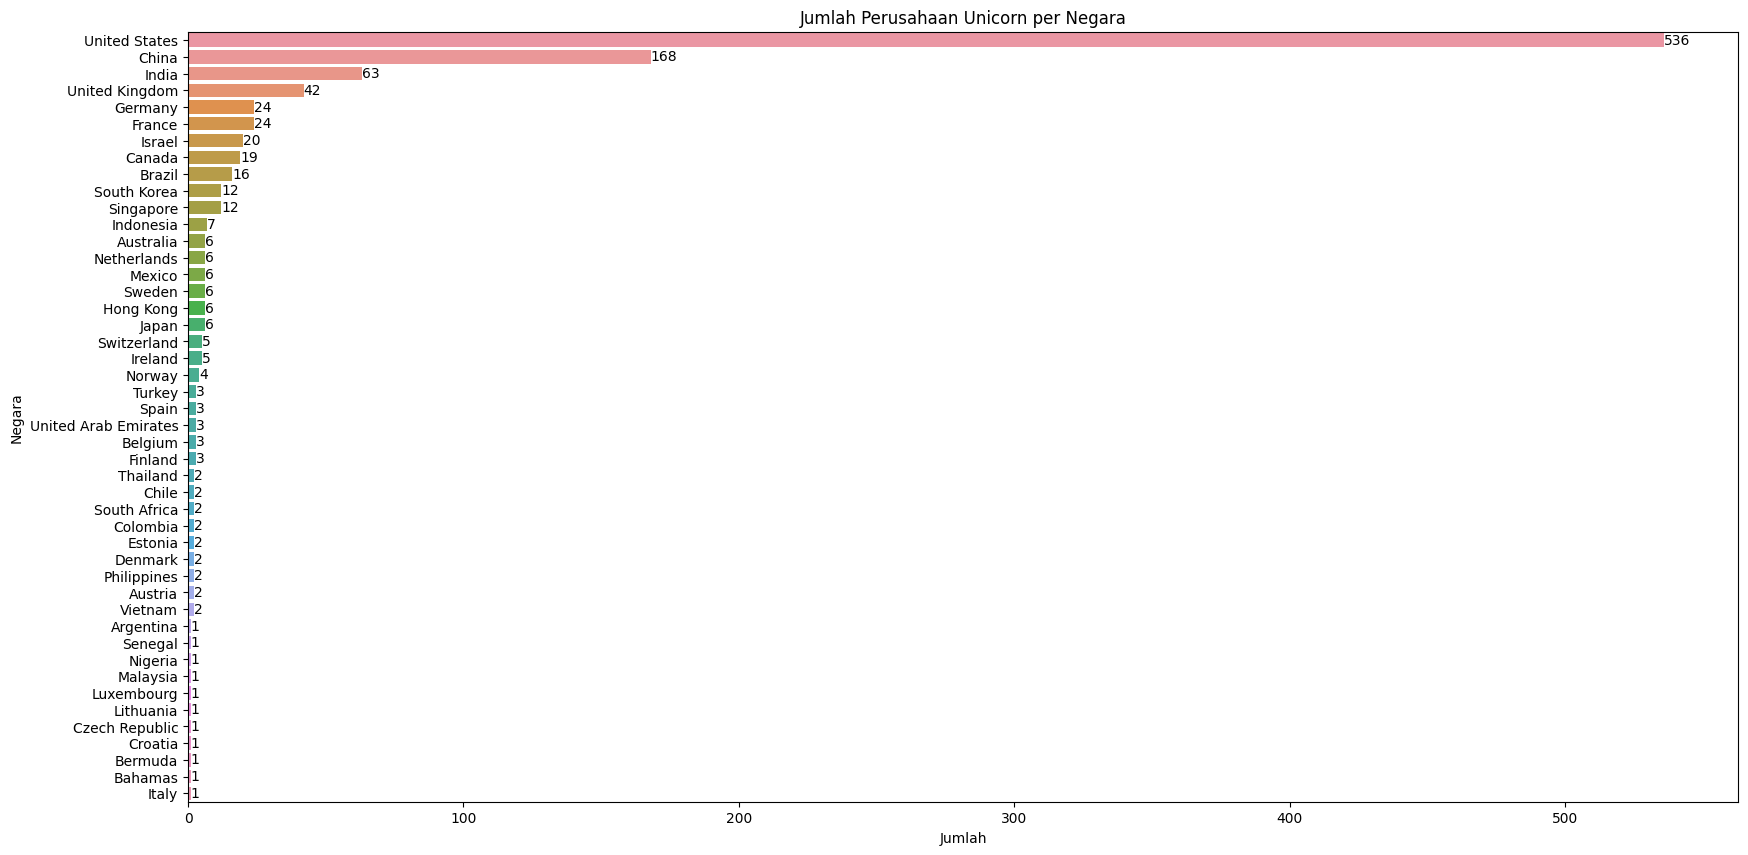

In [4]:

fig, ax = plt.subplots(figsize=(20, 10))

jumlah_uniorn = df['Company'].groupby(df['Country']).count().sort_values(ascending=False)

sns.barplot(
    x=jumlah_uniorn,
    y=jumlah_uniorn.index,
    ax=ax
)

ax.set(xlabel = "Jumlah",
        ylabel = "Negara",
        title = "Jumlah Perusahaan Unicorn per Negara")

for i in ax.containers:
    ax.bar_label(i,)

plt.show()

### Amerika Serikat Mempunyai Perusahaan Unicorn Terbanyak

C:\Users\Bimasakti Cahyo Utom\AppData\Local\Temp\ipykernel_18752\4265406551.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df2["Valuation ($B)"] = df["Valuation ($B)"].str.replace("$","").astype("float64")


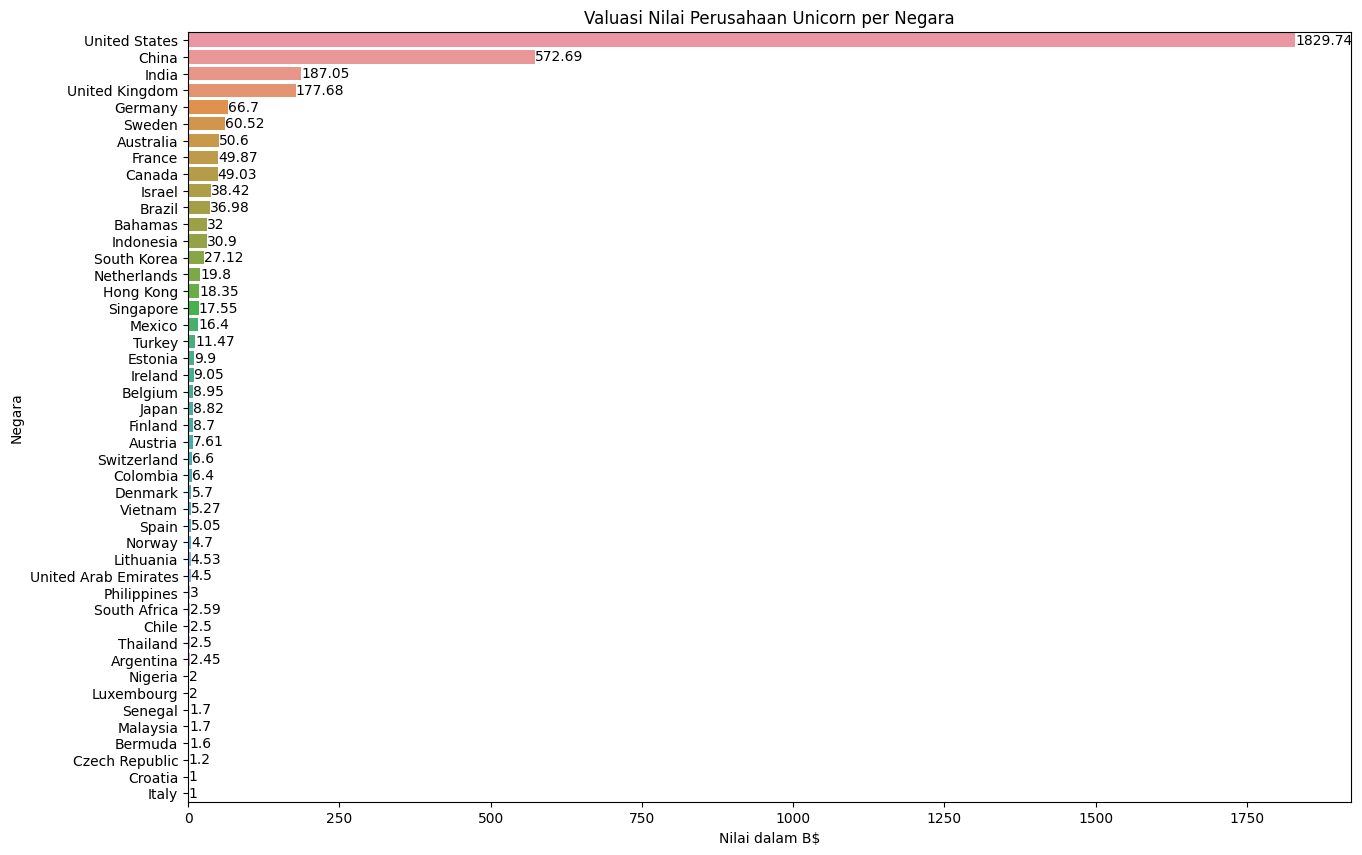

In [5]:

fig, valuasi = plt.subplots(figsize=(15, 10))

df2["Valuation ($B)"] = df["Valuation ($B)"].str.replace("$","").astype("float64")

nilai_perusahaan = df.groupby(["Country"])["Valuation ($B)"].sum().sort_values(ascending=False)

valuasi = sns.barplot(
    x=nilai_perusahaan,
    y=nilai_perusahaan.index,
)

valuasi.set(xlabel = "Nilai dalam B$",
        ylabel = "Negara",
        title = "Valuasi Nilai Perusahaan Unicorn per Negara")

for i in valuasi.containers:
    valuasi.bar_label(i,)


plt.show()

### Total valuasi perusahaan-perusahaan Unicorn di Amerika Serikat adalah yang paling tinggi, bahkan melebihi total valuasi semua perusahaan dari negara-negara lain yang digabungkan.

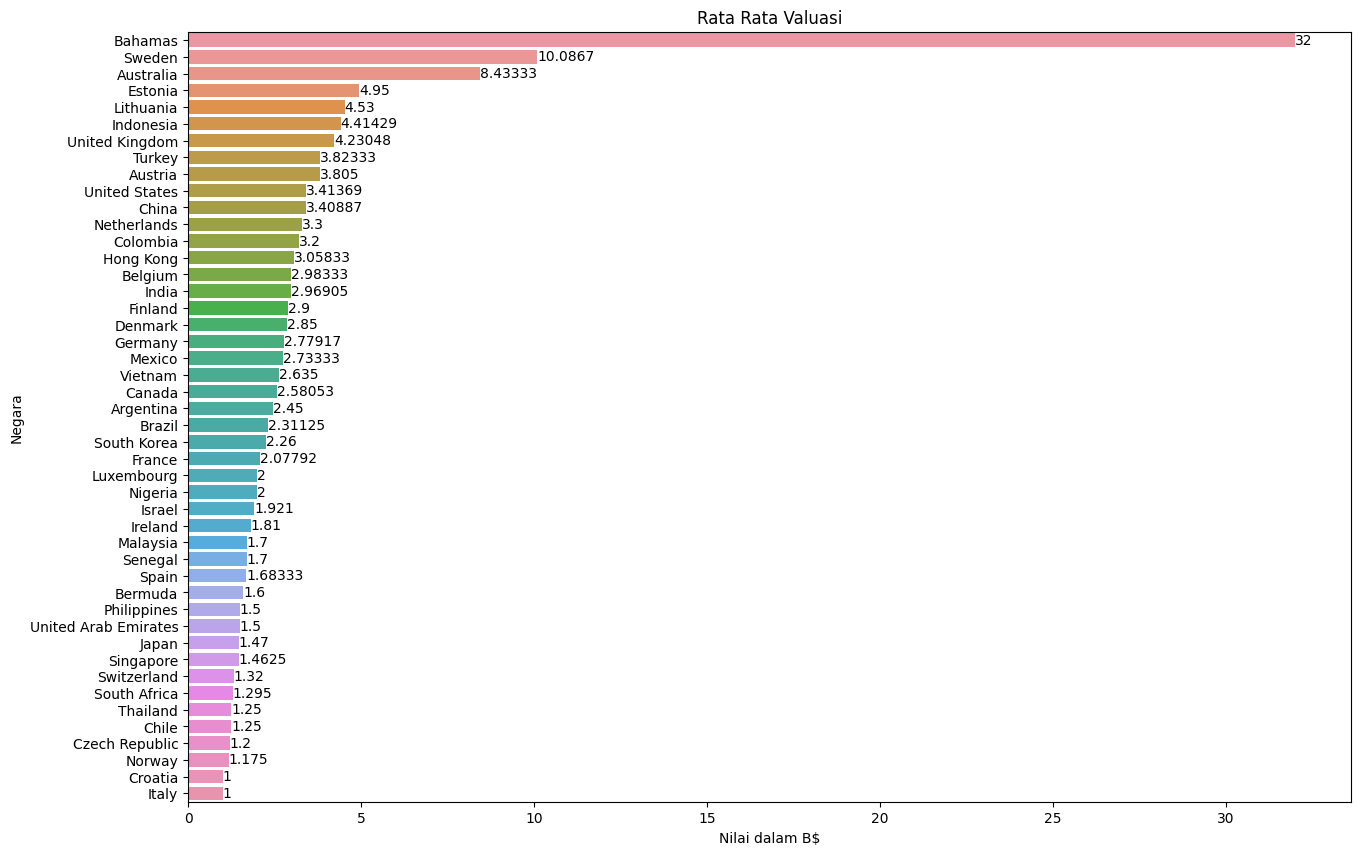

In [6]:
fig, countryvalues = plt.subplots(figsize=(15, 10))

countryvalues = df.groupby('Country')['Valuation ($B)'].mean().sort_values(ascending=False)


rata_rata = sns.barplot(x = countryvalues,
                y = countryvalues.index)

for i in rata_rata.containers:
        rata_rata.bar_label(i,)

rata_rata.set(xlabel = "Nilai dalam B$",
        ylabel = "Negara",
        title = "Rata Rata Valuasi")

plt.show()

### Meskipun mempunyai perusahaan terbanyak dan total valuasi tertinggi, rata rata valuasi perusahaan Amerika Serilkat bukan lah yang tertinggi dan hanya menempati peringkat 10, bahkan lebih rendah dari Indonesia. Perusahaan unicorn di Bahamas mempunyai rata rata valuasi tertinggi

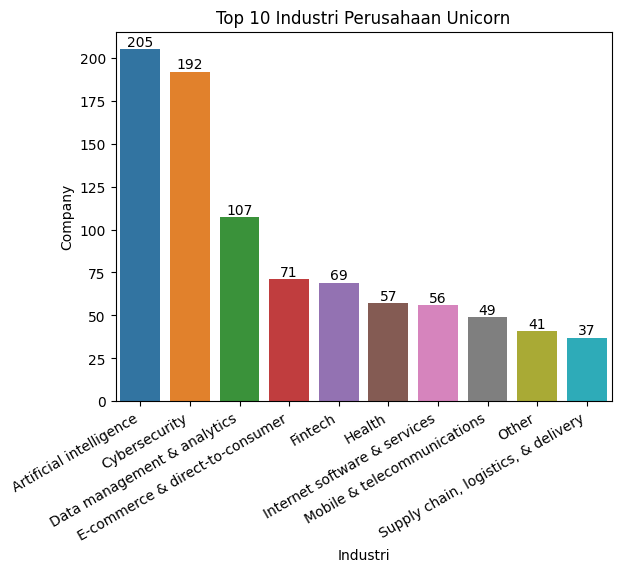

In [7]:
kategori_industri = df.loc[df['Industry'].isin(df['Industry'].value_counts().index[:10])]
industri = kategori_industri.groupby('Industry')["Company"].count()
industri_data = sns.barplot(x = industri.index,
                y = industri.sort_values(ascending=False))

plt.xticks(rotation=30, ha='right')

for i in industri_data.containers:
        industri_data.bar_label(i,)

industri_data.set(xlabel = "Industri",
        ylabel = "Company",
        title = "Top 10 Industri Perusahaan Unicorn")

plt.show()

### Industri Artificial Inteligence Merupakan penyumbang perusahaan Unicorn terbanyak

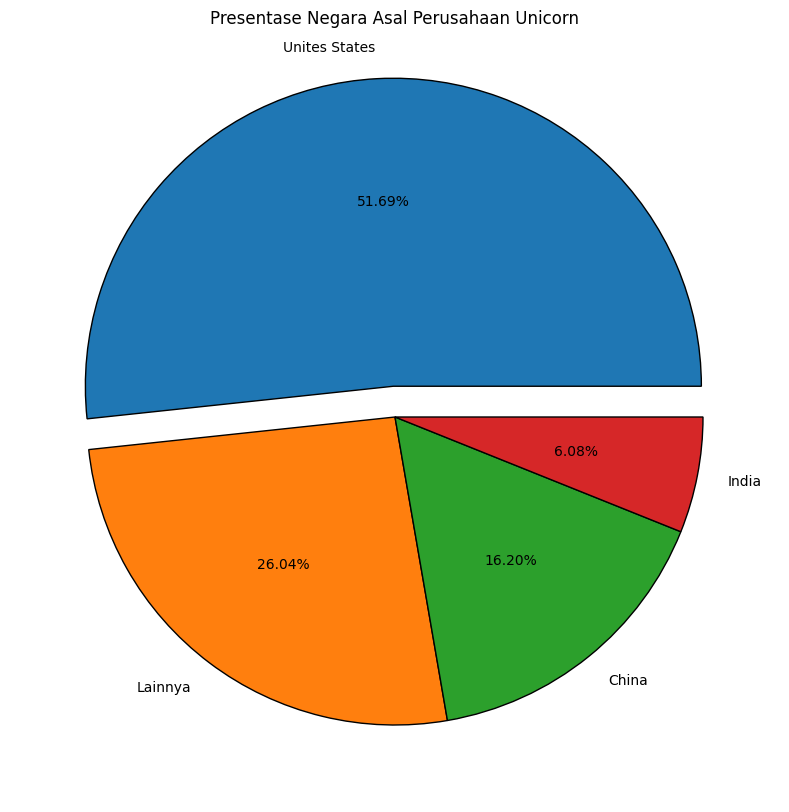

In [8]:
fig, ax = plt.subplots(figsize=(15, 10))

def newColumn(value):
    if value == "United States":
        return "United States"
    elif value == "India":
        return "India"
    elif value == "China":
        return "China"
    else:
        return "Others"

df2["NewColumn"] = df["Country"].apply(newColumn)

pie_chart = plt.title("Presentase Negara Asal Perusahaan Unicorn")
plt.pie(df2["NewColumn"].value_counts(),
    autopct = '%.2f%%',
    labels= ["Unites States" , "Lainnya", "China", "India"],
    wedgeprops = {"edgecolor" : "black",
                'linewidth': 1,
                'antialiased': True},
    explode = [0.1,0,0,0]
)

plt.show()

### Lebih dari setengah perusahaan Unicorn berada di Amerika Serikat

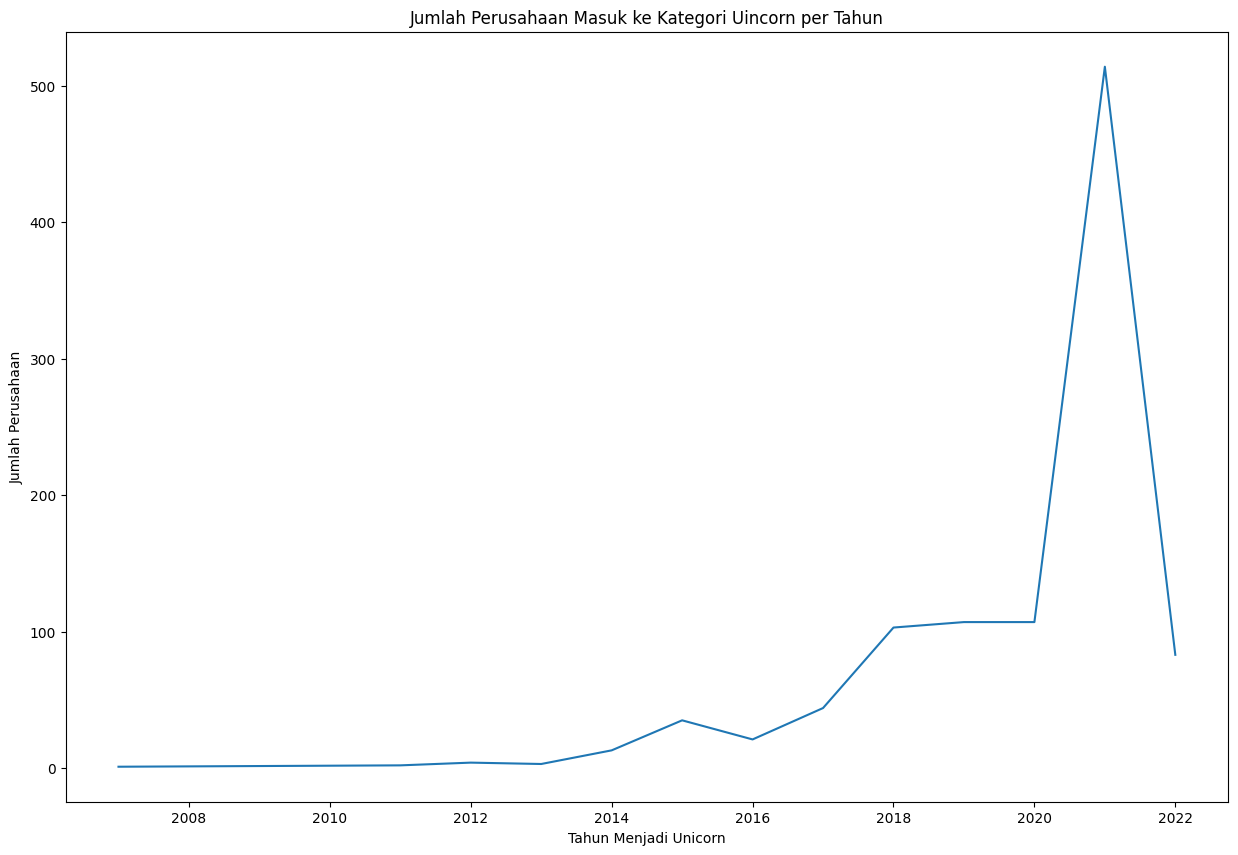

In [18]:
fig, ax = plt.subplots(figsize=(15, 10))

tahun = pd.DatetimeIndex(df["Date Joined"]).year
data_tahun = df.groupby(tahun)

plt.title("Jumlah Perusahaan Masuk ke Kategori Uincorn per Tahun")
plt.xlabel("Tahun Menjadi Unicorn")
plt.ylabel("Jumlah Perusahaan")
sns.lineplot(data_tahun["Company"].count())

plt.show()

### Jumlah Perusahaan yang menjadi Unicorn meningkat setiap tahunnya,tren itu menurun pada puncak pandemi COVID-19

In [10]:
df2["Founded Year"] = df["Founded Year"].replace('None', '1900').astype("int64")
df2['Portfolio Exits'] = df['Portfolio Exits'].replace('None', '0').astype("int64")
df2['Investors Count'] = df['Investors Count'].replace('None', '0').astype("int64")
df2['Deal Terms'] = df['Deal Terms'].replace('None', '0').astype("int64")
df2['Investors Count'] = df['Investors Count'].replace('None', '0').astype("float64")

### Konversi Kolom dari object ke numerik agar bisa digunakan di Heatmap
- replace : untuk mengubah element string
- astype : untuk mengubah tipe data

<AxesSubplot: >

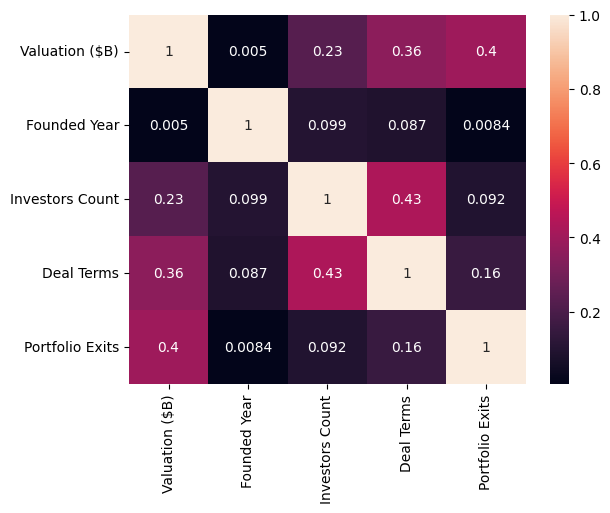

In [11]:
df2["Date Joined"] = pd.DatetimeIndex(df["Date Joined"])
sns.heatmap(df2.corr(),
        annot=True)

### Setiap Kolom hampir tidak memiliki korelasi antara satu dengan yang lainnya, yang paling tinggi yaitu kolom Deal Terms dan Investor count yang dimana semakin banyaknya investor maka kemungkinan terjadi deal akan semakin tinggi